In [2]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

import os
import numpy as np
import pandas as np

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
print(os.listdir("../chest_xray/chest_xray"))
print(os.listdir("../chest_xray/chest_xray/train"))

['.DS_Store', 'test', 'train', 'val']
['.DS_Store', 'NORMAL', 'PNEUMONIA']


NORMAL


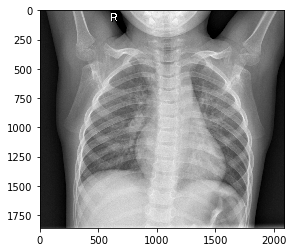

In [12]:
img_normal = load_img('../chest_xray/chest_xray/train/NORMAL/IM-0115-0001.jpeg')
print('NORMAL')
plt.imshow(img_normal)

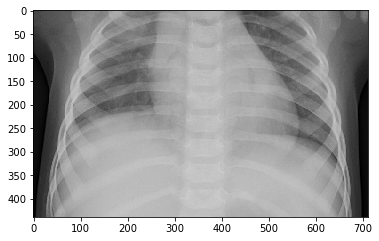

In [17]:
img_pneumonia = load_img('../chest_xray/chest_xray/train/PNEUMONIA/person1_bacteria_1.jpeg')
plt.imshow(img_pneumonia)

In [30]:
img_width, img_height = 150, 150
train_data_dir = '../chest_xray/chest_xray/train'
validation_data_dir = '../chest_xray/chest_xray/val'
test_data_dir = '../chest_xray/chest_xray/test'

nb_train_samples = 5217
nb_validation_samples = 17
epochs = 20
batch_size = 16

In [20]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [21]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size =(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



In [22]:
model.layers

In [25]:
model.compile(loss='binary_crossentropy',
             optimizer = 'rmsprop',
             metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [26]:
#augmentation config for training
train_datagen = ImageDataGenerator(
                rescale = 1. / 255,
                shear_range=0.2,
                zoom_range = 0.2,
                horizontal_flip = True)

In [28]:
#augmentation config for testing
#only rescaling
test_datagen = ImageDataGenerator(rescale = 1. /255)

In [31]:
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 5216 images belonging to 2 classes.


In [32]:
validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 16 images belonging to 2 classes.


In [33]:
test_generator = test_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

Found 624 images belonging to 2 classes.


In [34]:
model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)


Epoch 1/20
326/326 [==============================] - 92s 284ms/step - loss: 0.4239 - accuracy: 0.8204 - val_loss: 0.4134 - val_accuracy: 0.8125
Epoch 2/20
326/326 [==============================] - 95s 290ms/step - loss: 0.2923 - accuracy: 0.8834 - val_loss: 1.5000 - val_accuracy: 0.6250
Epoch 3/20
326/326 [==============================] - 94s 288ms/step - loss: 0.2453 - accuracy: 0.9082 - val_loss: 0.6702 - val_accuracy: 0.6875
Epoch 4/20
326/326 [==============================] - 94s 288ms/step - loss: 0.2188 - accuracy: 0.9172 - val_loss: 1.0685 - val_accuracy: 0.6250
Epoch 5/20
326/326 [==============================] - 99s 303ms/step - loss: 0.1993 - accuracy: 0.9308 - val_loss: 1.9881 - val_accuracy: 0.6250
Epoch 6/20
326/326 [==============================] - 101s 309ms/step - loss: 0.2068 - accuracy: 0.9310 - val_loss: 0.4797 - val_accuracy: 0.8125
Epoch 7/20
326/326 [==============================] - 98s 302ms/step - loss: 0.2018 - accuracy: 0.9310 - val_loss: 0.7093 - val_

In [38]:
model.save('pneumoniaNN.model')